In [3]:
PROJECT_NAME = "my-cicd-safe7"

assert PROJECT_NAME is not None and isinstance(
    PROJECT_NAME, str
), "Please specify the project name as string"

In [4]:
import boto3
from IPython.core.display import HTML, display

def get_provisioned_product_name(project_name):
    region = boto3.Session().region_name
    sc = boto3.client("servicecatalog")
    products = sc.search_provisioned_products(
        Filters={
            "SearchQuery": [project_name]
        }
    )
    pp = products["ProvisionedProducts"]
    if len(pp) != 1:
        print("Invalid provisioned product name. Open the link below and search manually")
        display(
            HTML(
                f'<a target="_blank" href="https://{region}.console.aws.amazon.com/servicecatalog/home?region={region}#provisioned-products">Service Catalog</a>'
            )
        )
        raise ValueError("Invalid provisioned product")
    return pp[0]["Name"]

PROVISIONED_PRODUCT_NAME = get_provisioned_product_name(project_name=PROJECT_NAME)
print(
    f"The associated Service Catalog Provisioned Product Name to this SageMaker project: {PROVISIONED_PRODUCT_NAME}"
)

C:\Users\MMNAD1\AppData\Local\Temp\ipykernel_91608\3013737566.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import HTML, display


The associated Service Catalog Provisioned Product Name to this SageMaker project: my-cicd-safe7-p-m3haucikxkf1


In [5]:
!aws s3 cp 's3://nyc-tlc/trip data/green_tripdata_2018-02.csv' 'nyc-tlc.csv'


Unknown options: 'nyc-tlc.csv'


In [7]:
import pandas as pd

In [14]:
parse_dates = ["lpep_dropoff_datetime", "lpep_pickup_datetime"]
df = pd.read_parquet("../data/green_tripdata_2018-02.parquet")

In [15]:
df.to_csv("../data/nyc-tlc.csv")

In [16]:
df = pd.read_csv("../data/nyc-tlc.csv", parse_dates=parse_dates)

In [17]:
df

,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,0,2,2018-02-01 00:39:38,2018-02-01 00:39:41,N,5,97,65,1,0.00,...,0.0,0.0,3.00,0.0,NaN,0.0,23.00,1,2,NaN
1,1,2,2018-02-01 00:58:28,2018-02-01 01:05:35,N,1,256,80,5,1.60,...,0.5,0.5,0.88,0.0,NaN,0.3,9.68,1,1,NaN
2,2,2,2018-02-01 00:56:05,2018-02-01 01:18:54,N,1,25,95,1,9.60,...,0.5,0.5,5.96,0.0,NaN,0.3,35.76,1,1,NaN
3,3,2,2018-02-01 00:12:40,2018-02-01 00:15:50,N,1,61,61,1,0.73,...,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2,1,NaN
4,4,2,2018-02-01 00:45:18,2018-02-01 00:51:56,N,1,65,17,2,1.87,...,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769192,769192,2,2018-02-28 23:39:30,2018-02-28 23:43:54,N,1,41,42,1,0.86,...,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1,NaN
769193,769193,2,2018-02-28 23:25:40,2018-02-28 23:45:02,N,1,256,17,1,2.22,...,0.5,0.5,2.00,0.0,NaN,0.3,17.30,1,1,NaN
769194,769194,2,2018-02-28 23:39:19,2018-02-28 23:53:08,N,1,42,229,1,5.67,...,0.5,0.5,1.00,0.0,NaN,0.3,20.30,1,1,NaN
769195,769195,2,2018-02-28 23:40:13,2018-02-28 23:43:34,N,1,42,74,1,0.59,...,0.5,0.5,2.00,0.0,NaN,0.3,7.80,1,1,NaN


In [ ]:

df["duration_minutes"] = (
    df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]
).dt.seconds / 60

In [21]:
df["duration_minutes"]

0          0.050000
1          7.116667
2         22.816667
3          3.166667
4          6.633333
            ...    
769192     4.400000
769193    19.366667
769194    13.816667
769195     3.350000
769196     9.400000
Name: duration_minutes, Length: 769197, dtype: float64

In [22]:
list(df.columns)

['Unnamed: 0',
 'VendorID',
 'lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'store_and_fwd_flag',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'ehail_fee',
 'improvement_surcharge',
 'total_amount',
 'payment_type',
 'trip_type',
 'congestion_surcharge',
 'duration_minutes']

In [23]:
cols = ["total_amount", "duration_minutes", "passenger_count", "trip_distance"]
data_df = df[cols]
print(data_df.shape)
data_df.head()

(769197, 4)


,total_amount,duration_minutes,passenger_count,trip_distance
0,23.00,0.050000,1,0.00
1,9.68,7.116667,5,1.60
2,35.76,22.816667,1,9.60
3,5.80,3.166667,1,0.73
4,9.30,6.633333,2,1.87


In [25]:
data_df.describe()

,total_amount,duration_minutes,passenger_count,trip_distance
count,769197.000000,769197.000000,769197.000000,769197.000000
mean,14.155066,19.539828,1.356703,2.725421
std,10.702896,93.877734,1.034211,2.882038
min,-400.000000,0.000000,0.000000,0.000000
25%,7.800000,6.016667,1.000000,1.000000
50%,11.150000,10.116667,1.000000,1.750000
75%,17.000000,16.850000,1.000000,3.370000
max,2626.300000,1439.883333,9.000000,120.470000


In [26]:
data_df = data_df[
    (data_df.total_amount > 0)
    & (data_df.total_amount < 200)
    & (data_df.duration_minutes > 0)
    & (data_df.duration_minutes < 120)
    & (data_df.trip_distance > 0)
    & (data_df.trip_distance < 121)
    & (data_df.passenger_count > 0)
].dropna()
data_df.head()

,total_amount,duration_minutes,passenger_count,trip_distance
1,9.68,7.116667,5,1.60
2,35.76,22.816667,1,9.60
3,5.80,3.166667,1,0.73
4,9.30,6.633333,2,1.87
5,21.30,21.433333,2,5.69


In [27]:
data_df.shape

(753930, 4)

<Axes: xlabel='duration_minutes', ylabel='trip_distance'>

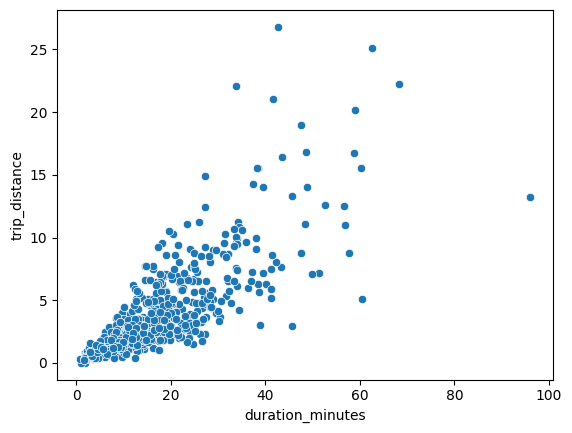

In [28]:
import seaborn as sns

sample_df = data_df.sample(1000)
sns.scatterplot(data=sample_df, x="duration_minutes", y="trip_distance")

<Axes: xlabel='duration_minutes', ylabel='total_amount'>

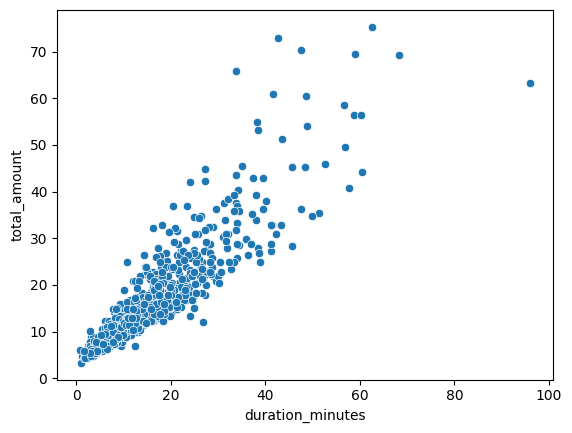

In [31]:
sns.scatterplot(data=sample_df, x="duration_minutes", y="total_amount")

In [32]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(data_df, test_size=0.20, random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.05, random_state=42)

test_df.reset_index(inplace=True, drop=True)
print(
    f"Size of\n train: {train_df.shape[0]}\n val: {val_df.shape[0]}\n test: {train_df.shape[0]}"
)

Size of
 train: 603144
 val: 143246
 test: 603144


In [ ]:
train_cols = ["total_amount", "duration_minutes", "passenger_count", "trip_distance"]
train_df.to_csv("../data/train.csv", index=False, header=False)
val_df.to_csv("../data/validation.csv", index=False, header=False)
test_df.to_csv("../data/test.csv", index=False, header=False)

train_df.to_csv("../data/baseline.csv", index=False, header=True)

In [37]:
import sagemaker

session = sagemaker.Session()
bucket = "mlops-nyctaxi-p-m3haucikxkf1"

prefix = "nyc-tlc/v1"

s3_train_uri = session.upload_data("../data/train.csv", bucket, prefix + "/data/training")
s3_val_uri = session.upload_data("../data/validation.csv", bucket, prefix + "/data/validation")
s3_test_uri = session.upload_data("../data/test.csv", bucket, prefix + "/data/test")
s3_baseline_uri = session.upload_data("../data/baseline.csv", bucket, prefix + "/data/baseline")

In [38]:
s3_train_uri

's3://mlops-nyctaxi-p-m3haucikxkf1/nyc-tlc/v1/data/training/train.csv'

In [40]:
import boto3
from botocore.exceptions import ClientError
import os
import time

def get_config(provisioned_product_name):
    sc = boto3.client("servicecatalog")
    outputs = sc.get_provisioned_product_outputs(ProvisionedProductName=provisioned_product_name)["Outputs"]
    config = {}
    for out in outputs:
        config[out["OutputKey"]] = out["OutputValue"]
    return config

config = get_config(PROVISIONED_PRODUCT_NAME)
region = config["Region"]
artifact_bucket = config["ArtifactBucket"]
pipeline_name = config["PipelineName"]
model_name = config["ModelName"]
workflow_pipeline_arn = config["WorkflowPipelineARN"]

print("region: {}".format(region))
print("artifact bucket: {}".format(artifact_bucket))
print("pipeline: {}".format(pipeline_name))
print("model name: {}".format(model_name))
print("workflow: {}".format(workflow_pipeline_arn))

region: us-east-1
artifact bucket: mlops-nyctaxi-p-m3haucikxkf1
pipeline: mlops-nyctaxi-p-m3haucikxkf1
model name: nyctaxi
workflow: arn:aws:states:us-east-1:395435558728:stateMachine:mlops-nyctaxi


In [42]:
sc = boto3.client("servicecatalog")
outputs = sc.get_provisioned_product_outputs(ProvisionedProductName=PROVISIONED_PRODUCT_NAME)["Outputs"]

In [46]:
# outputs

In [55]:
from io import BytesIO
import zipfile
import json

input_data = {
    "TrainingUri": s3_train_uri,
    "ValidationUri": s3_val_uri,
    "TestUri": s3_test_uri,
    "BaselineUri": s3_baseline_uri
}

hyperparameters = {"num_round": 50}
zip_buffer = BytesIO()
with zipfile.ZipFile(zip_buffer, "a") as zf:
    zf.writestr("inputData.json", json.dumps(input_data))
    zf.writestr("hyperparameters.json", json.dumps(hyperparameters))
zip_buffer.seek(0)

data_source_key = f"{pipeline_name}/data-source.zip"

In [47]:
s3 = boto3.client("s3")
s3.put_object(Bucket=artifact_bucket, Key=data_source_key, Body=bytearray(zip_buffer.read()))

{'ResponseMetadata': {'RequestId': 'Y4D5KA1968P1NYMK',
  'HostId': 'JzTkrm7KzYpfOD3nkI2V6xzebLcYB+vejB/IHJAdU46rdkzLsjN4ExItJfEK8UJgWio0ir+T6QW/DcM8aXqB1MP3spH7Ciev',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'JzTkrm7KzYpfOD3nkI2V6xzebLcYB+vejB/IHJAdU46rdkzLsjN4ExItJfEK8UJgWio0ir+T6QW/DcM8aXqB1MP3spH7Ciev',
   'x-amz-request-id': 'Y4D5KA1968P1NYMK',
   'date': 'Mon, 29 Sep 2025 15:34:29 GMT',
   'x-amz-version-id': 'S1dHm.ahGjnzbGfQkl7uWKRx9DwFDXKx',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"ac883094fc45cf6b91e3c1b992b27640"',
   'x-amz-checksum-crc32': 'OCCILg==',
   'x-amz-checksum-type': 'FULL_OBJECT',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"ac883094fc45cf6b91e3c1b992b27640"',
 'ChecksumCRC32': 'OCCILg==',
 'ChecksumType': 'FULL_OBJECT',
 'ServerSideEncryption': 'AES256',
 'VersionId': 'S1dHm.ahGjnzbGfQkl7uWKRx9DwFDXKx'}

In [56]:
print(zip_buffer.read())

b'PK\x03\x04\x14\x00\x00\x00\x00\x00\xdb\xa8=[\xb4\xf8\x11\x1f_\x01\x00\x00_\x01\x00\x00\x0e\x00\x00\x00inputData.json{"TrainingUri": "s3://mlops-nyctaxi-p-m3haucikxkf1/nyc-tlc/v1/data/training/train.csv", "ValidationUri": "s3://mlops-nyctaxi-p-m3haucikxkf1/nyc-tlc/v1/data/validation/validation.csv", "TestUri": "s3://mlops-nyctaxi-p-m3haucikxkf1/nyc-tlc/v1/data/test/test.csv", "BaselineUri": "s3://mlops-nyctaxi-p-m3haucikxkf1/nyc-tlc/v1/data/baseline/baseline.csv"}PK\x03\x04\x14\x00\x00\x00\x00\x00\xdb\xa8=[.\xd5d\x1a\x11\x00\x00\x00\x11\x00\x00\x00\x14\x00\x00\x00hyperparameters.json{"num_round": 50}PK\x01\x02\x14\x00\x14\x00\x00\x00\x00\x00\xdb\xa8=[\xb4\xf8\x11\x1f_\x01\x00\x00_\x01\x00\x00\x0e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x01\x00\x00\x00\x00inputData.jsonPK\x01\x02\x14\x00\x14\x00\x00\x00\x00\x00\xdb\xa8=[.\xd5d\x1a\x11\x00\x00\x00\x11\x00\x00\x00\x14\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x01\x8b\x01\x00\x00hyperparameters.jsonPK\x05\x06\x00\x00\x00\x00